# ***`E-Commerce Data Analysis Using Python`***

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel("E-commerce_dataset.xlsx", sheet_name="data")

# ***`Data Cleaning & Transformation`***

In [30]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Row ID               0
Order ID             0
Order Date           0
Customer ID          0
Segment              0
City                 0
State                0
Country              0
Country latitude     0
Country longitude    0
Region               0
Market               0
Subcategory          0
Category             0
Product              0
Quantity             0
Sales                0
Discount             0
Profit               0
dtype: int64


In [33]:
# Unique values in categorical columns
for col in ['Segment', 'Category', 'Subcategory', 'Region', 'Market']:
    print(f"Unique values in {col}:\n", df[col].unique(), "\n")

# Convert text columns to consistent case
df['Segment'] = df['Segment'].str.strip().str.title()
df['Category'] = df['Category'].str.strip().str.title()
df['Subcategory'] = df['Subcategory'].str.strip().str.title()
df['Region'] = df['Region'].str.strip().str.title()
df['Market'] = df['Market'].str.strip().str.upper()

Unique values in Segment:
 ['Corporate' 'Self-Employed' 'Consumer'] 

Unique values in Category:
 ['Body Care' 'Face Care' 'Hair Care' 'Home And Accessories' 'Make Up'] 

Unique values in Subcategory:
 ['Bath Oils, Bubbles And Soaks' 'Body Moisturizers'
 'Body Soaps And Washes' 'Face Masks And Exfoliators' 'Hand Creams'
 'Nail Care Products' 'Vitamins And Supplements'
 'Face Moisturizing Products' 'Hair Colors And Toners'
 'Shampoos And Conditioners' 'Accessories' 'Brushes And Applicators'
 'Candles, Sprays, Diffusers' 'Fragrances' 'Eye Shadows And Pencils'
 'Foundations And Concealers' 'Lipsticks'] 

Unique values in Region:
 ['Western Asia' 'South America' 'Caribbean' 'Eastern Asia'
 'Eastern Europe' 'Oceania' 'Central America' 'Southern Us'
 'Southern Europe' 'Western Us' 'Western Europe' 'Southeastern Asia'
 'Western Africa' 'North Africa' 'Southern Asia' 'Central Us'
 'Central Africa' 'Eastern Africa' 'Central Asia' 'Southern Africa'
 'Northern Europe' 'Canada' 'Eastern Us'] 

Uni

In [34]:
# 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Extract useful time-based features
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Day'] = df['Order Date'].dt.day
df['Order Weekday'] = df['Order Date'].dt.day_name()

In [35]:
# Convert categorical columns to category type for efficient memory usage
categorical_columns = ['Segment', 'Category', 'Subcategory', 'Region', 'Market', 'Country']
for col in categorical_columns:
    df[col] = df[col].astype('category')

# ***`Cleaned Data`***

In [36]:
# Save the cleaned dataset to a new file
df.to_csv("Cleaned_Ecommerce_Data.csv", index=False)

# ***`Data Visualization & Insights`***

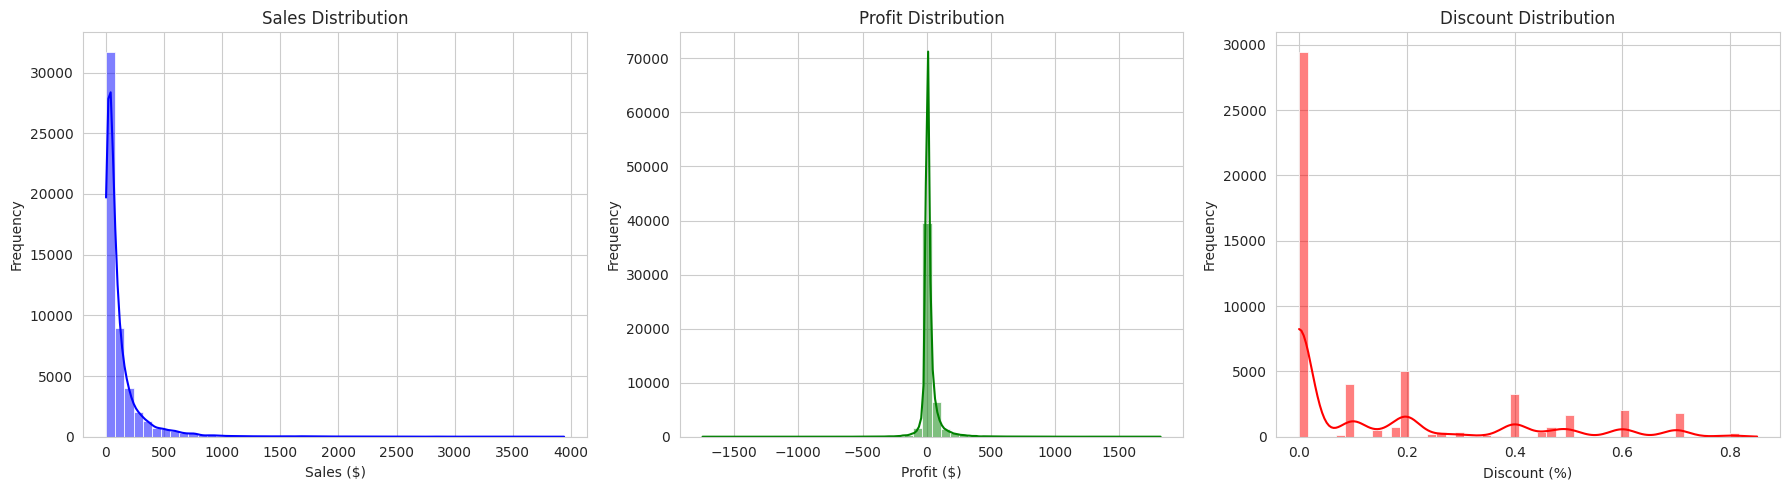

In [37]:
# Set plot style
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Sales distribution
sns.histplot(df["Sales"], bins=50, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Sales Distribution")
axes[0].set_xlabel("Sales ($)")
axes[0].set_ylabel("Frequency")

# Profit distribution
sns.histplot(df["Profit"], bins=50, kde=True, ax=axes[1], color="green")
axes[1].set_title("Profit Distribution")
axes[1].set_xlabel("Profit ($)")
axes[1].set_ylabel("Frequency")

# Discount distribution
sns.histplot(df["Discount"], bins=50, kde=True, ax=axes[2], color="red")
axes[2].set_title("Discount Distribution")
axes[2].set_xlabel("Discount (%)")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

<ipython-input-38-e601959dbcea>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_analysis = df.groupby("Segment")[["Sales", "Profit"]].sum().reset_index()
<ipython-input-38-e601959dbcea>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Segment", y="Sales", data=segment_analysis, ax=axes[0], palette="Blues")
<ipython-input-38-e601959dbcea>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Segment", y="Profit", data=segment_analysis, ax=axes[1], palette="Greens")


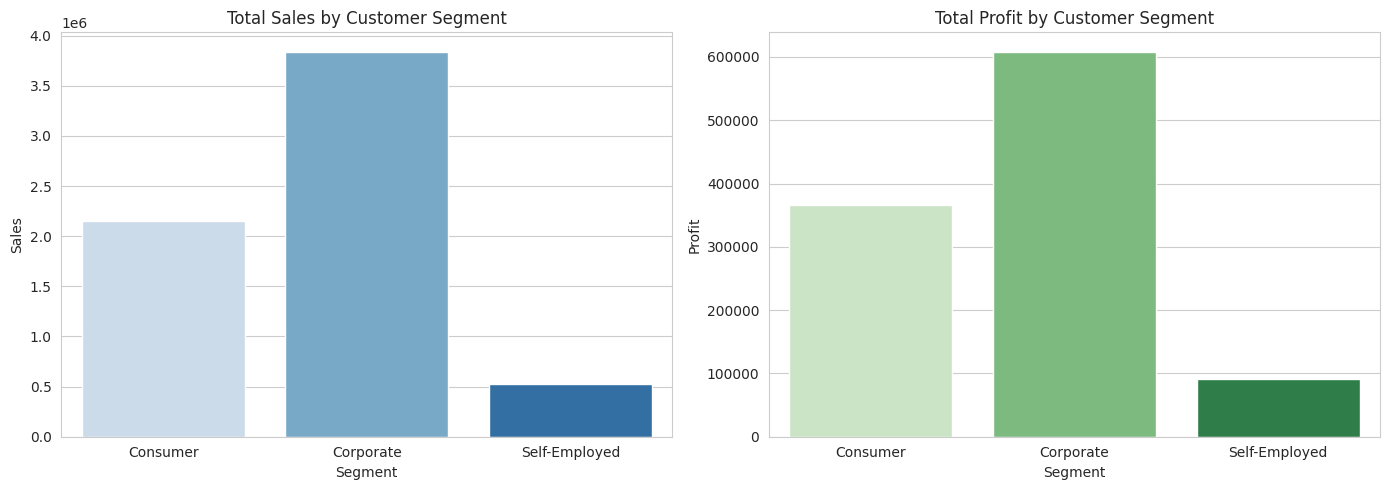

In [38]:
# Sales & Profit by Customer Segment
segment_analysis = df.groupby("Segment")[["Sales", "Profit"]].sum().reset_index()

# Create bar charts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Sales by Segment
sns.barplot(x="Segment", y="Sales", data=segment_analysis, ax=axes[0], palette="Blues")
axes[0].set_title("Total Sales by Customer Segment")

# Profit by Segment
sns.barplot(x="Segment", y="Profit", data=segment_analysis, ax=axes[1], palette="Greens")
axes[1].set_title("Total Profit by Customer Segment")

plt.tight_layout()
plt.show()

<ipython-input-45-4279082ae4b5>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_analysis = df.groupby(["Category", "Subcategory"])["Profit"].sum().reset_index()


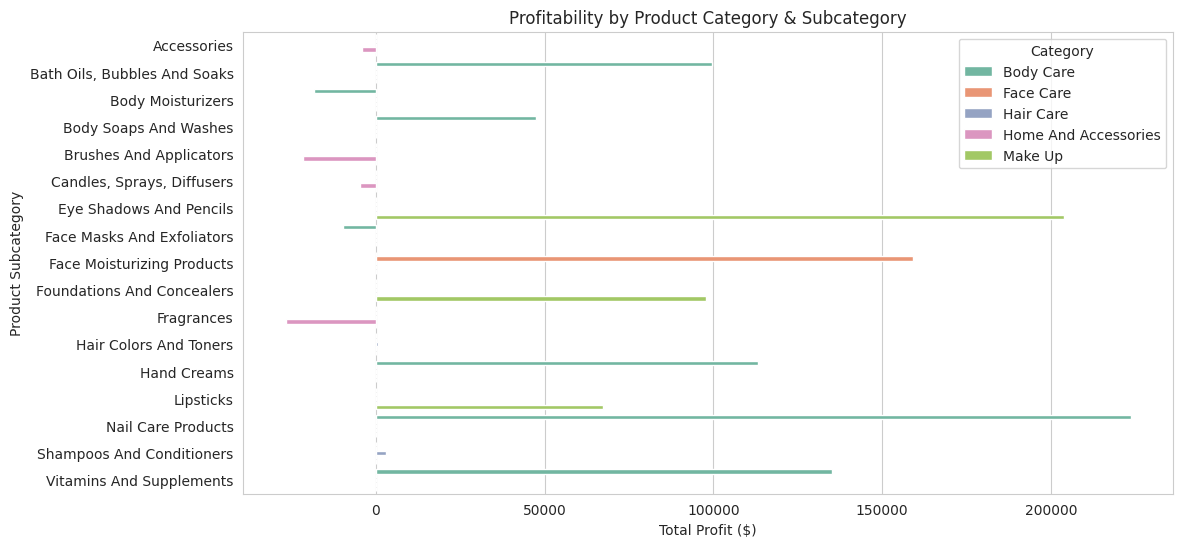

In [45]:
# Profit by Category & Subcategory
category_analysis = df.groupby(["Category", "Subcategory"])["Profit"].sum().reset_index()

# Sort for better visualization
category_analysis = category_analysis.sort_values(by="Profit", ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Profit", y="Subcategory", hue="Category", data=category_analysis, palette="Set2")
plt.title("Profitability by Product Category & Subcategory")
plt.xlabel("Total Profit ($)")
plt.ylabel("Product Subcategory")
plt.show()

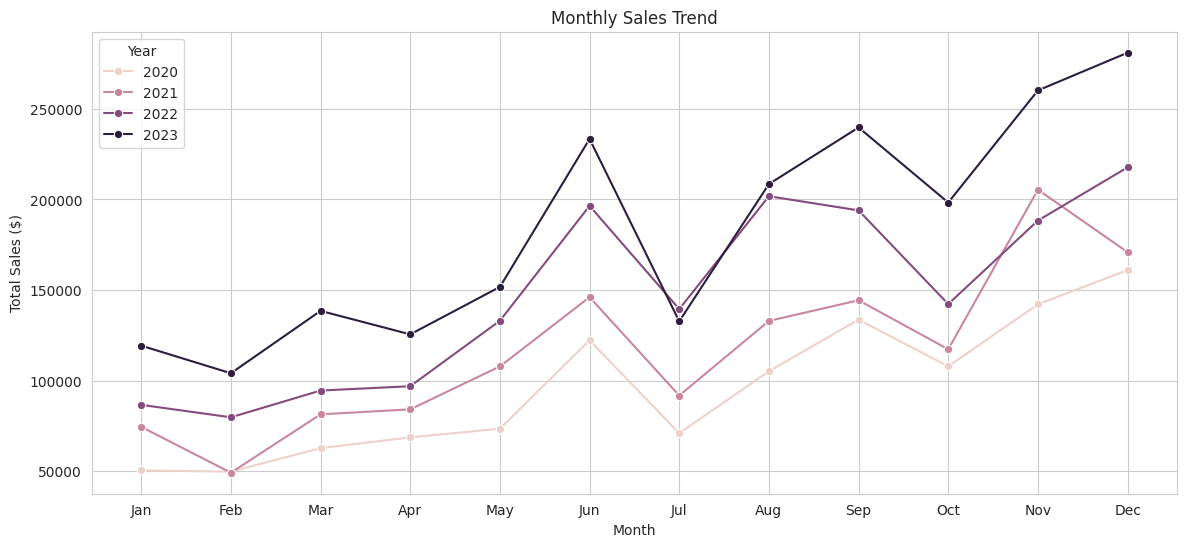

In [46]:
# Sales & Profit Trends Over Time
time_analysis = df.groupby(["Order Year", "Order Month"])[["Sales", "Profit"]].sum().reset_index()

# Convert month numbers to labels
import calendar
time_analysis["Month Name"] = time_analysis["Order Month"].apply(lambda x: calendar.month_abbr[x])

# Plot Sales & Profit Trends
plt.figure(figsize=(14, 6))
sns.lineplot(x="Month Name", y="Sales", hue="Order Year", data=time_analysis, marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.legend(title="Year")
plt.show()

<ipython-input-47-d29b10470051>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Profit", y="Product", data=profitable_products, palette="viridis")


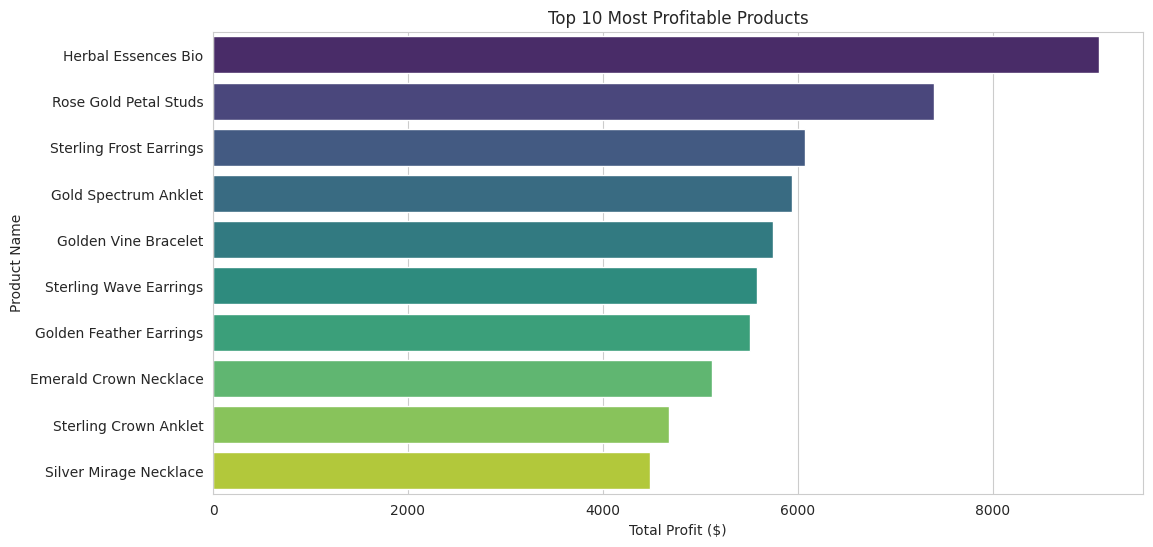

<ipython-input-47-d29b10470051>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_profit = df.groupby("Category")[["Sales", "Profit"]].sum().reset_index()
<ipython-input-47-d29b10470051>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Category", y="Profit", data=category_profit, palette="coolwarm")


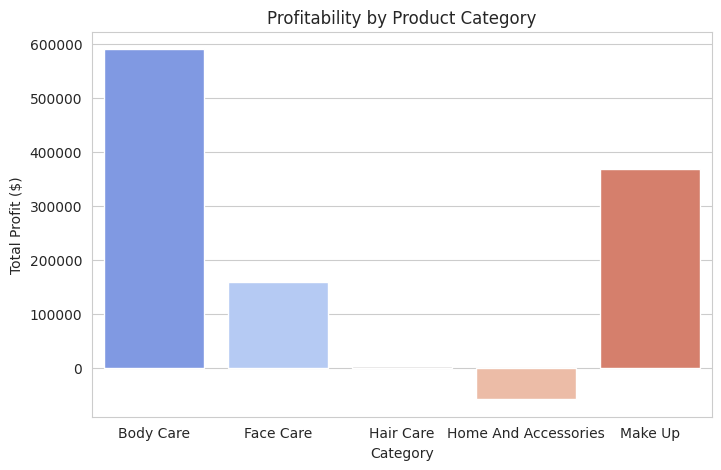

In [47]:
# Most Profitable Products
profitable_products = df.groupby("Product")[["Sales", "Profit"]].sum().reset_index()
profitable_products = profitable_products.sort_values(by="Profit", ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Profit", y="Product", data=profitable_products, palette="viridis")
plt.title("Top 10 Most Profitable Products")
plt.xlabel("Total Profit ($)")
plt.ylabel("Product Name")
plt.show()

# Most Profitable Categories
category_profit = df.groupby("Category")[["Sales", "Profit"]].sum().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x="Category", y="Profit", data=category_profit, palette="coolwarm")
plt.title("Profitability by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Profit ($)")
plt.show()

<ipython-input-57-73802c2cb65c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_analysis = df.groupby("Region")[["Sales", "Profit"]].sum().reset_index()
<ipython-input-57-73802c2cb65c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Region", y="Profit", data=region_analysis, palette="coolwarm")


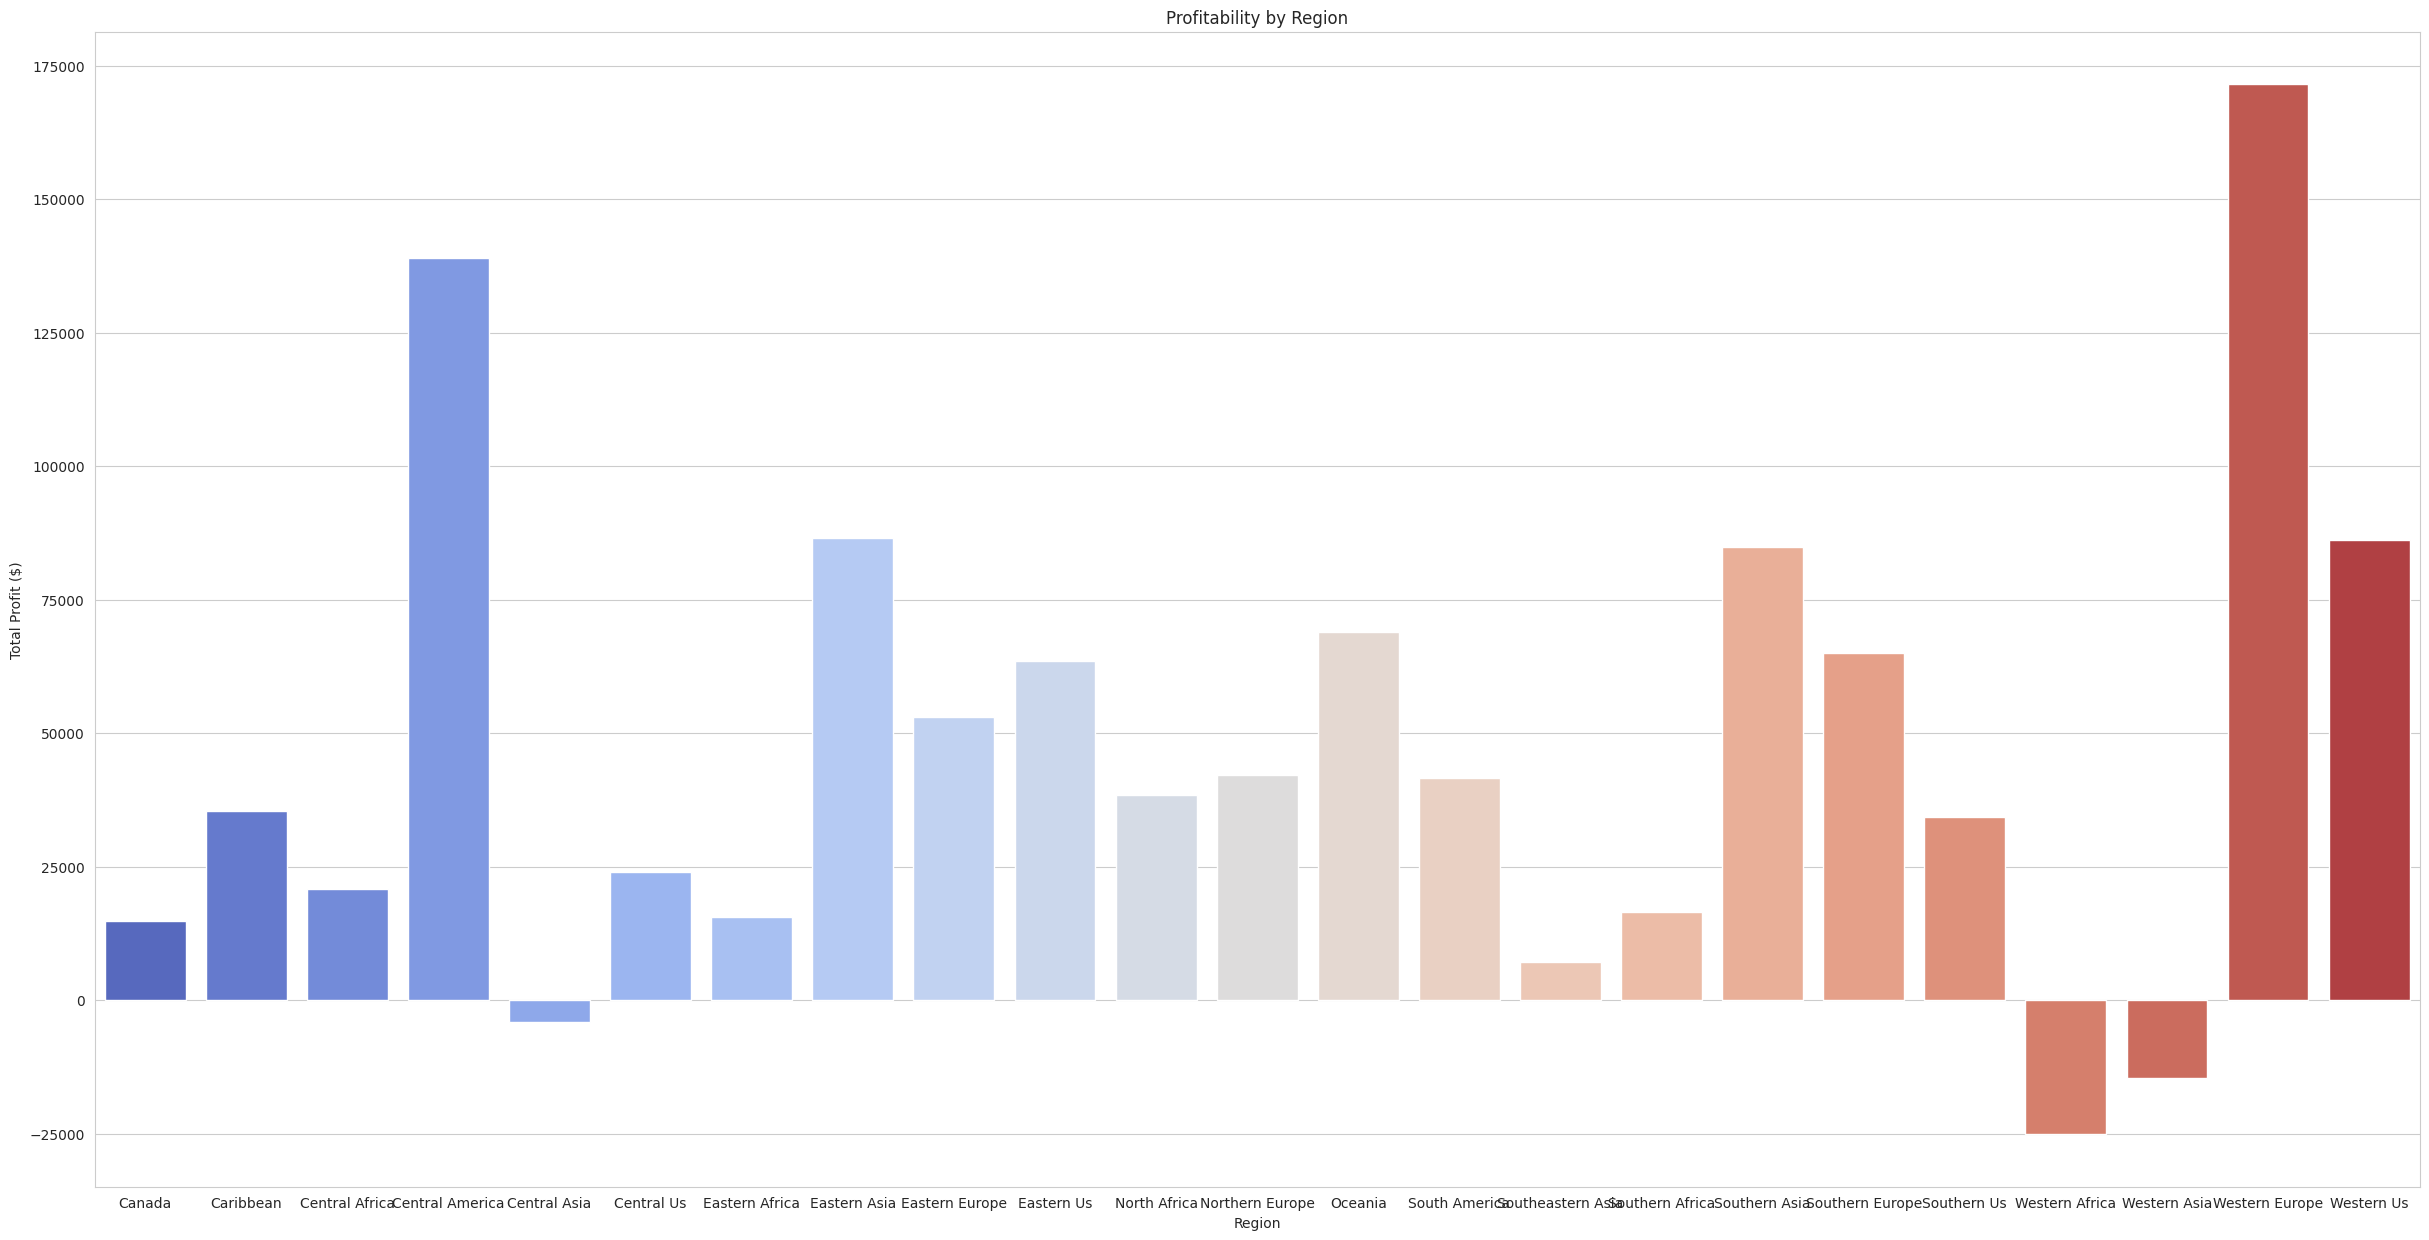

In [57]:
# Sales and Profit by Region
region_analysis = df.groupby("Region")[["Sales", "Profit"]].sum().reset_index()

# Plot
plt.figure(figsize=(30, 15))
sns.barplot(x="Region", y="Profit", data=region_analysis, palette="coolwarm")
plt.title("Profitability by Region")
plt.xlabel("Region")
plt.ylabel("Total Profit ($)")
plt.show()

<ipython-input-65-2521e21469b8>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_sales = df.groupby("Country")["Sales"].sum().reset_index().sort_values(by="Sales", ascending=False)
<ipython-input-65-2521e21469b8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sales", y="Country", data=country_sales, palette="magma")


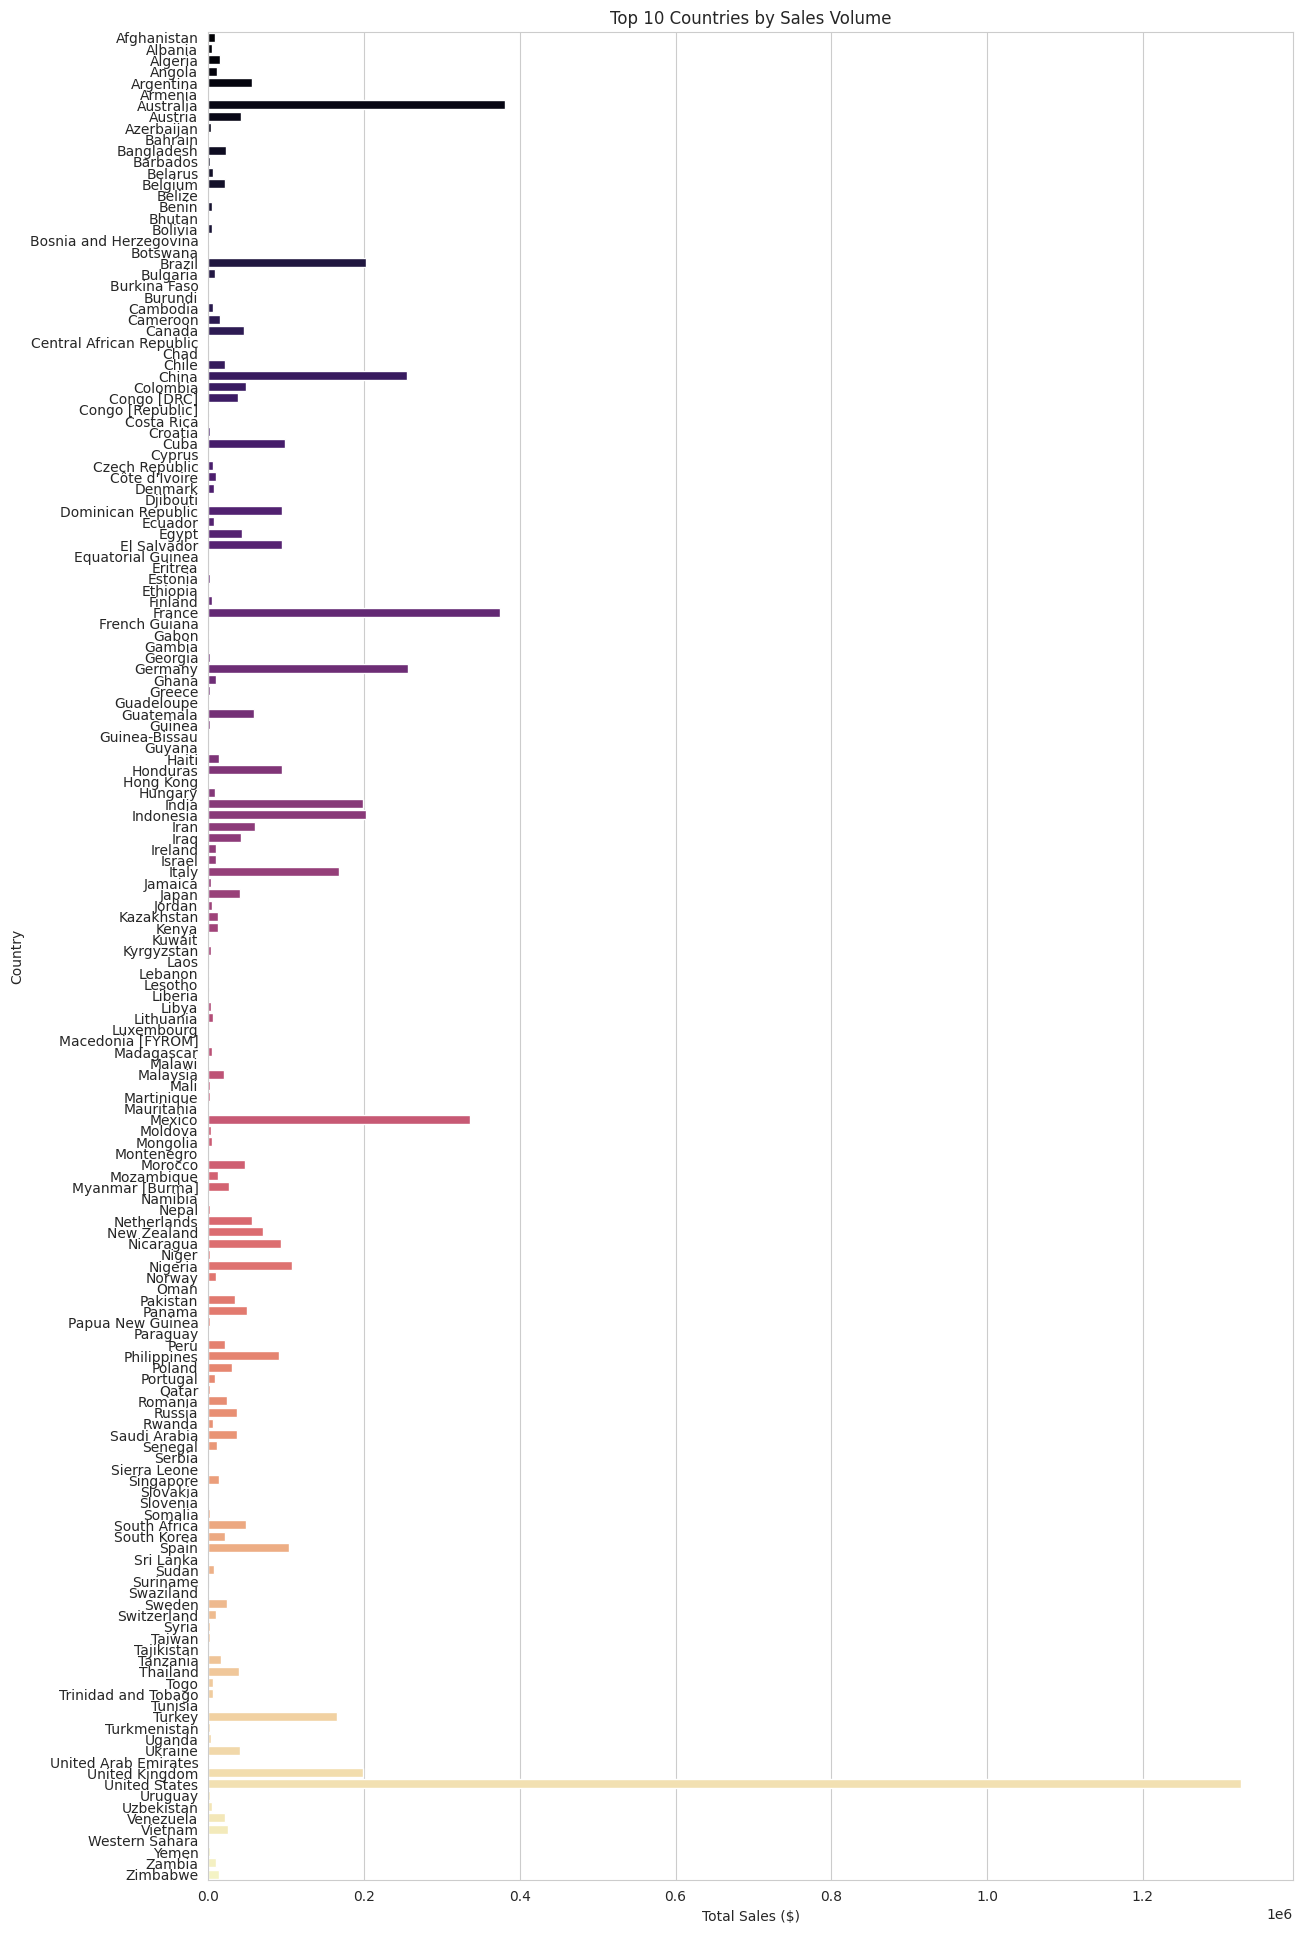

In [65]:
# Sales by Country
country_sales = df.groupby("Country")["Sales"].sum().reset_index().sort_values(by="Sales", ascending=False)

# Plot
plt.figure(figsize=(14, 24))
sns.barplot(x="Sales", y="Country", data=country_sales, palette="magma")
plt.title("Top 10 Countries by Sales Volume")
plt.xlabel("Total Sales ($)")
plt.ylabel("Country")
plt.show()

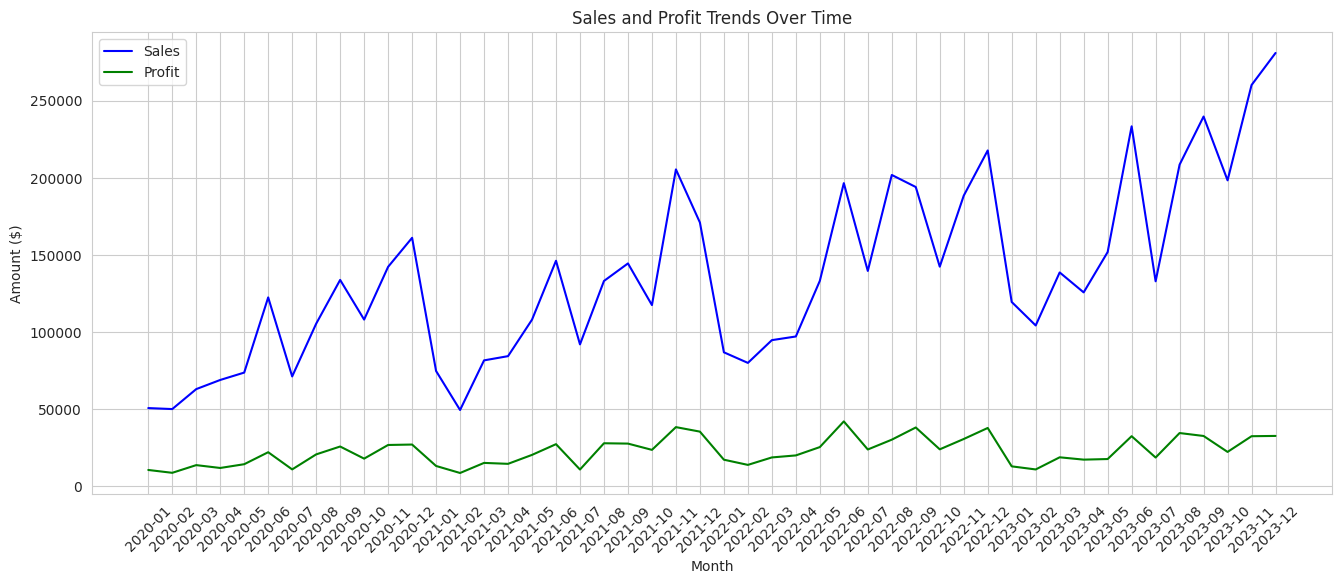

In [67]:
# Convert 'Order Date' to datetime
df["Order Date"] = pd.to_datetime(df["Order Date"])

# Group by month and sum sales & profit
df["Month"] = df["Order Date"].dt.to_period("M")
time_trends = df.groupby("Month")[["Sales", "Profit"]].sum().reset_index()

# Plot
plt.figure(figsize=(16, 6))
sns.lineplot(x=time_trends["Month"].astype(str), y="Sales", data=time_trends, label="Sales", color="blue")
sns.lineplot(x=time_trends["Month"].astype(str), y="Profit", data=time_trends, label="Profit", color="green")
plt.xticks(rotation=45)
plt.title("Sales and Profit Trends Over Time")
plt.xlabel("Month")
plt.ylabel("Amount ($)")
plt.legend()
plt.show()

<ipython-input-71-ca88a6bd6a3d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_sales = df.groupby("Country")["Sales"].sum().reset_index().tail(10)
<ipython-input-71-ca88a6bd6a3d>:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sns.heatmap(country_sales.pivot_table(values="Sales", index="Country"), cmap="Blues", annot=True, fmt=".2f")


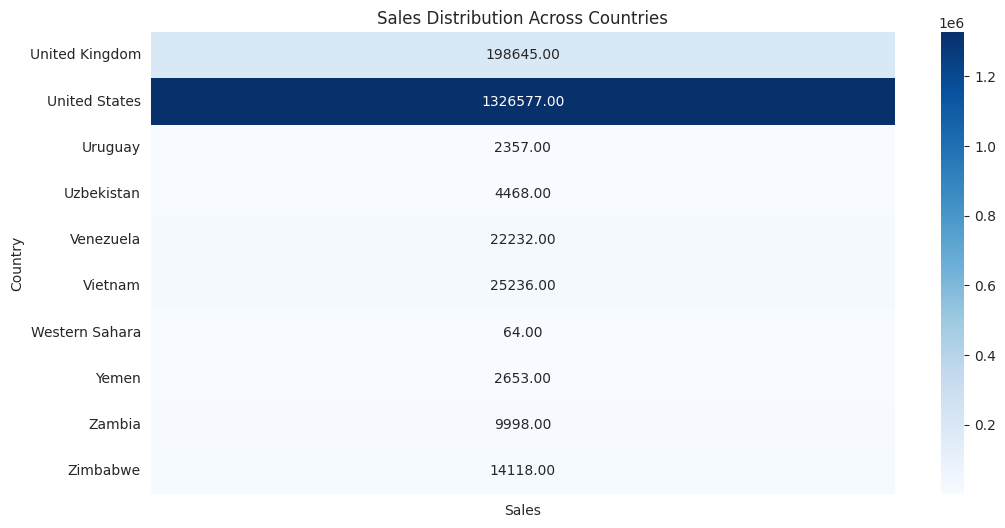

In [71]:
# Sales by Country
country_sales = df.groupby("Country")["Sales"].sum().reset_index().tail(10)
country_sales = country_sales.sort_values(by="Sales", ascending=False)

# Plot
# Convert to heatmap format
plt.figure(figsize=(12, 6))
sns.heatmap(country_sales.pivot_table(values="Sales", index="Country"), cmap="Blues", annot=True, fmt=".2f")
plt.title("Sales Distribution Across Countries")
plt.ylabel("Country")
plt.show()

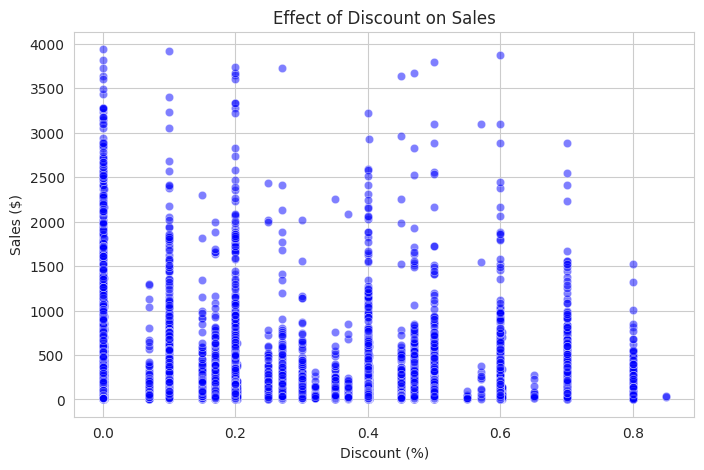

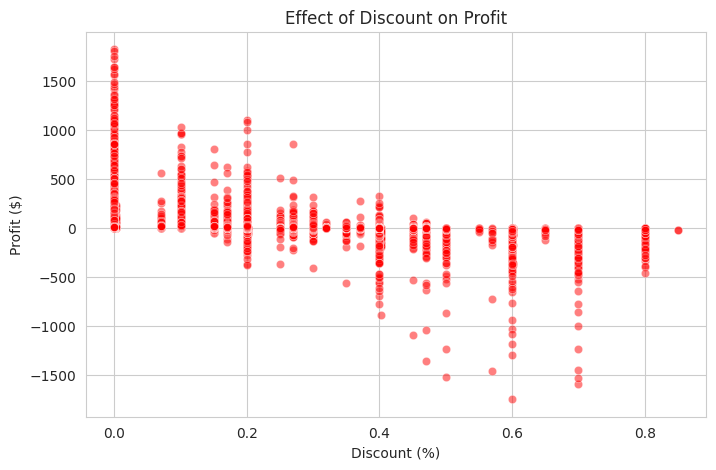

In [74]:
# Scatter Plot: Discount vs Sales
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Discount", y="Sales", data=df, alpha=0.5, color="blue")
plt.title("Effect of Discount on Sales")
plt.xlabel("Discount (%)")
plt.ylabel("Sales ($)")
plt.show()

# Scatter Plot: Discount vs Profit
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Discount", y="Profit", data=df, alpha=0.5, color="red")
plt.title("Effect of Discount on Profit")
plt.xlabel("Discount (%)")
plt.ylabel("Profit ($)")
plt.show()

<ipython-input-73-36e8ec6f39ff>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_sales = df.groupby("Segment")["Sales"].sum()


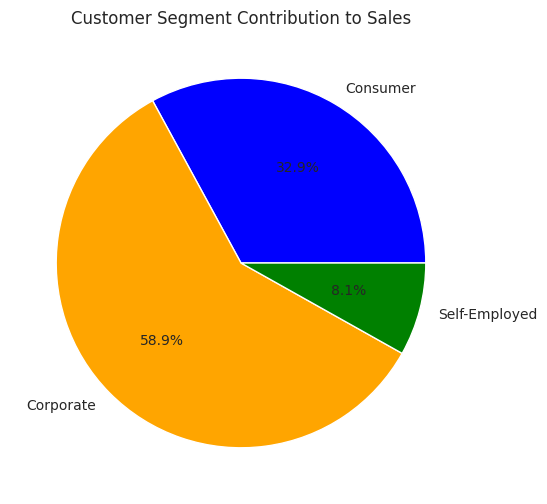

In [73]:
# Sales by Customer Segment
segment_sales = df.groupby("Segment")["Sales"].sum()

# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(segment_sales, labels=segment_sales.index, autopct="%1.1f%%", colors=["blue", "orange", "green"])
plt.title("Customer Segment Contribution to Sales")
plt.show()